# Coronary Heart disease  prediction using ML

# GUI  IMPLENTATION

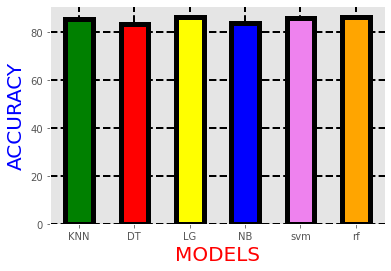

[0.]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
%matplotlib inline
import seaborn as sns
from tkinter import *
import tkinter.messagebox as M
import warnings
warnings.filterwarnings('ignore')
###  load  the  dataset 

df=pd.read_csv("framingham.csv")
df.head()   #### display  5 rows 
df1=df.drop(columns=["education"])
df1.head()
features_to_drop = ['currentSmoker', 'diaBP']
df2=df1.drop(columns=features_to_drop)   #  df1.drop(features_to_drop,axis=1)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df3=pd.DataFrame(imputer.fit_transform(df2))
df3.columns = df2.columns
df3.index = df3.index

a=len(df3[df3['BMI'] > 43])
b=len(df3[df3['heartRate'] > 125])
c=len(df3[df3['glucose'] > 200])
d=len( df3[df3['totChol'] > 450])
e=len(df3[df3['sysBP'] > 220])

#print('Number of training examples to be deleted for outliers removal is ',x)
df3 = df3[~(df3['sysBP'] > 220)]
df3 = df3[~(df3['BMI'] > 43)]
df3 = df3[~(df3['heartRate'] > 125)]
df3 = df3[~(df3['glucose'] > 200)]
df3 = df3[~(df3['totChol'] > 450)]
#print(df3.shape)

# Standardise some features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','cigsPerDay','totChol','sysBP',\
                       'BMI', 'heartRate', 'glucose']
df3[cols_to_standardise] = scaler.fit_transform(df3[cols_to_standardise])

X=df3.drop(columns=["TenYearCHD"])
Y=df3.TenYearCHD
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=40)
def knn():
    global K
    global acc_knn
    from sklearn.neighbors import KNeighborsClassifier
    K=KNeighborsClassifier(n_neighbors=7)
    # train the model
    K.fit(X_train,Y_train)
    # test the model
    Y_pred_knn=K.predict(X_test)
    ##  Find accuracy
    from sklearn.metrics import accuracy_score
    acc_knn=round(accuracy_score(Y_pred_knn,Y_test)*100,2)
    M.showinfo(title="KNearest Neighbors",message="Accuracy is"+str(acc_knn))
def logreg():
    global L
    global acc_lg
    from sklearn.linear_model import LogisticRegression
    L=LogisticRegression()
    ####Train the model by training dataset
    L.fit(X_train,Y_train)
    ######test the model
    Y_pred_logreg=L.predict(X_test)
   
    #####Find accuracy for logistic regression
    from sklearn.metrics import accuracy_score
    acc_lg=round(accuracy_score(Y_pred_logreg,Y_test)*100,2)
    M.showinfo(title="Logistic Regression",message="Accuracy is"+str(acc_lg))
def naivebayes():
    global N
    global acc_nb
    from sklearn.naive_bayes import GaussianNB
    N=GaussianNB()
    ##train the naive bayes model
    N.fit(X_train,Y_train)
    #test the model with testing dataset
    Y_pred_naive=N.predict(X_test)
    #Find   accuracy
    from sklearn.metrics import accuracy_score
    acc_nb=round(accuracy_score(Y_pred_naive,Y_test)*100,2)
    M.showinfo(title="Naive Bayes",message="Accuracy is"+str(acc_nb))
def decisiontree():
    global D
    global acc_dt
    from sklearn.tree import DecisionTreeClassifier
    D=DecisionTreeClassifier(min_samples_split=50, random_state=0)
    # train the model
    D.fit(X_train,Y_train)
    # test the model
    Y_pred_dt=D.predict(X_test)
    ##  Find accuracy
    from sklearn.metrics import accuracy_score
    acc_dt=accuracy_score(Y_test,Y_pred_dt)
    acc_dt=round(acc_dt*100,2)
    M.showinfo(title="Decision Tree",message="Accuracy is"+str(acc_dt)) 
def svm():
    global acc_sv
    from sklearn.svm import SVC
    S=SVC(C=1,kernel='rbf')
    # train the model
    S.fit(X_train,Y_train)
    # test the model
    Y_pred_sv=S.predict(X_test)
    ##  Find accuracy
    from sklearn.metrics import accuracy_score
    acc_sv=accuracy_score(Y_test,Y_pred_sv)
    acc_sv=round(acc_sv*100,2)
    M.showinfo(title="SVM",message="Accuracy is"+str(acc_sv)) 
def rf():
    global acc_rf
    from sklearn.ensemble import RandomForestClassifier
    R=RandomForestClassifier(n_estimators=100,random_state=0)
    # train the model
    R.fit(X_train,Y_train)
    # test the model
    Y_pred_rf=R.predict(X_test)
    ##  Find accuracy
    from sklearn.metrics import accuracy_score
    acc_rf=accuracy_score(Y_test,Y_pred_rf)
    acc_rf=round(acc_rf*100,2)
    M.showinfo(title="RF",message="Accuracy is"+str(acc_rf)) 
def compare():
    global acc_knn;
    global acc_lg;
    global acc_nb;
    global acc_dt;
    global acc_rf;
    global acc_sv;
    
    
    models=["KNN","DT","LG","NB","svm","rf"]
    accuracy=[acc_knn,acc_dt,acc_lg,acc_nb,acc_sv,acc_rf]
    plt.bar(models,accuracy,color=["green","red","yellow","blue","violet","orange"],edgecolor="black",linewidth=5,width=0.5)
    plt.xlabel("MODELS",fontsize="20",color="red")
    plt.ylabel("ACCURACY",fontsize=20,color="blue")
    plt.grid(color="black",linestyle="--",linewidth=2)
    plt.show()
    M.showinfo(title='BEST MODEL',message="LOGISTIC REGRESSION")

def predict():
    a=float(v1.get())  #male
    b=float(v2.get()) #age
    c=float(v3.get()) #cigsPerDay
    d=float(v4.get())#BPMeds
    e=float(v5.get())#prevalentStroke
    f=float(v6.get())#prevalentHyp
    g=float(v7.get())#diabetes
    h=float(v8.get())#totChol
    i=float(v9.get())#sysbp
    j=float(v10.get())#BMI
    k=float(v11.get())#Heart rate
    l=float(v12.get())#glucose
    #----------------------------------------------------------------
    ###'age','totChol','sysBP',\
                      ## 'BMI', 'heartRate', 'glucose', 'cigsPerDay']
    #b,c,h,i,j,k,l
    
    new = scaler.transform([[b,c,h,i,j,k,l]])
    b1=new[0][0]
    c1=new[0][1]
    h1=new[0][2]
    i1=new[0][3]
    j1=new[0][4]
    k1=new[0][5]
    l1=new[0][6]
    #print(a,b1,c1,d,e,f,g,h1,i1,j1,l1)
    ##----------------------------------------------------------------
    ######predict by Logistic Regression as it is best
    result=L.predict([[a,b1,c1,d,e,f,g,h1,i1,j1,k1,l1]])
    if result==1.0:
        M.showinfo(title="heart Disease prediction",message="You may suffer from heart problem")
    else:
        M.showinfo(title="heart Disease prediction",message="You  dont have heart problem")
        print(result)
   
def reset():
    v1.set("")
    v2.set("")
    v3.set("")
    v4.set("")
    v5.set("")
    v6.set("")
    v7.set("")
    v8.set("")
    v9.set("")
    v10.set("")
    v11.set("")
    v12.set("")    
w=Tk()
w.configure(bg='gray')
w.title(" CORONARY HEART DISEASE PREDICTION")
v1=StringVar()
v2=StringVar()
v3=StringVar()
v4=StringVar()
v5=StringVar()
v6=StringVar()
v7=StringVar()
v8=StringVar()
v9=StringVar()
v10=StringVar()
v11=StringVar()
v12=StringVar()

L0=Label(w,relief="solid",font=('arial',20,'bold'),text=" CORONARY HEART DISEASE PREDICTION USING MACHINE LEARNING    ",bg='white',fg='red',)
B1=Button(w,pady=5,bd=5,bg="violet",command=knn,text='KNearest Neighbors',font=('arial',15,'bold'))
B2=Button(w,pady=5,bd=5,bg="violet",command=logreg,text='Logistic Regression',font=('arial',15,'bold'))
B3=Button(w,pady=5,bd=5,bg="violet",command=naivebayes,text='Naive Bayes',font=('arial',15,'bold'))
B4=Button(w,pady=5,bd=5,bg="violet",command=decisiontree,text='Decision Tree Classifier',font=('arial',15,'bold'))
B5=Button(w,pady=5,bd=5,bg="violet",command=svm,text='Support Vector Machine',font=('arial',15,'bold'))
B6=Button(w,pady=5,bd=5,bg="violet",command=rf,text='Random Forest Classifier',font=('arial',15,'bold'))


L0.grid(row=1,column=1,columnspan=4)
B1.grid(row=2,column=1)
B2.grid(row=2,column=2)
B3.grid(row=2,column=3)
B4.grid(row=2,column=4)
B5.grid(row=3,column=1)
B6.grid(row=3,column=2)
####################################################
L1=Label(w,text='MALE',font=('arial',15,'bold'))
L2=Label(w,text='AGE',font=('arial',15,'bold'))
L3=Label(w,text='CIGARETTE PER DAY',font=('arial',15,'bold'))
L4=Label(w,text='BP MEDICINE',font=('arial',15,'bold'))
L5=Label(w,text='HEART STROKE IN PAST',font=('arial',15,'bold'))
L6=Label(w,text='HYPERTENSION',font=('arial',15,'bold'))
L7=Label(w,text='DIABETES',font=('arial',15,'bold'))
L8=Label(w,text='CHOLESTEROL',font=('arial',15,'bold'))
L9=Label(w,text='BLOOD PRESSURE',font=('arial',15,'bold'))
L10=Label(w,text='BODY MASS INDEX',font=('arial',15,'bold'))
L11=Label(w,text='HEART RATE',font=('arial',15,'bold'))
L12=Label(w,text='GLUCOSE',font=('arial',15,'bold'))

E1=Entry(w,bd=5,textvariable=v1,bg='cyan',font=('arial',15,'bold'))
E2=Entry(w,bd=5,textvariable=v2,bg='cyan',font=('arial',15,'bold'))
E3=Entry(w,bd=5,textvariable=v3,bg='cyan',font=('arial',15,'bold'))
E4=Entry(w,bd=5,textvariable=v4,bg='cyan',font=('arial',15,'bold'))
E5=Entry(w,bd=5,textvariable=v5,bg='cyan',font=('arial',15,'bold'))
E6=Entry(w,bd=5,textvariable=v6,bg='cyan',font=('arial',15,'bold'))
E7=Entry(w,bd=5,textvariable=v7,bg='cyan',font=('arial',15,'bold'))
E8=Entry(w,bd=5,textvariable=v8,bg='cyan',font=('arial',15,'bold'))
E9=Entry(w,bd=5,textvariable=v9,bg='cyan',font=('arial',15,'bold'))
E10=Entry(w,bd=5,textvariable=v10,bg='cyan',font=('arial',15,'bold'))
E11=Entry(w,bd=5,textvariable=v11,bg='cyan',font=('arial',15,'bold'))
E12=Entry(w,bd=5,textvariable=v12,bg='cyan',font=('arial',15,'bold'))

#################################################
L1.grid(row=4,column=1)
E1.grid(row=4,column=2)
L2.grid(row=4,column=3)
E2.grid(row=4,column=4)
L3.grid(row=5,column=1)
E3.grid(row=5,column=2)
L4.grid(row=5,column=3)
E4.grid(row=5,column=4)
#######################################
L5.grid(row=6,column=1)
E5.grid(row=6,column=2)
L6.grid(row=6,column=3)
E6.grid(row=6,column=4)
L7.grid(row=7,column=1)
E7.grid(row=7,column=2)
L8.grid(row=7,column=3)
E8.grid(row=7,column=4)
###################################################
L9.grid(row=8,column=1)
E9.grid(row=8,column=2)
L10.grid(row=8,column=3)
E10.grid(row=8,column=4)
L11.grid(row=9,column=1)
E11.grid(row=9,column=2)
L12.grid(row=9,column=3)
E12.grid(row=9,column=4)

########################################
Bsub=Button(w,bd=5,relief="solid",bg='white',fg="blue",text="SUBMIT",font=('arial',15,'bold'),command=predict)
Bres=Button(w,bd=5,relief="solid",bg='white',fg='blue',text="CLEAR DATA",font=('arial',15,'bold'),command=reset)

Bcmp=Button(w,bd=5,pady=8,relief="solid",bg='white',fg="blue",command=compare,text='MODEL COMPARASION',font=('arial',20,'bold'))
Bcmp.grid(row=3,column=3,columnspan=2)
Bsub.grid(row=10,column=3)
Bres.grid(row=10,column=4)
##############################################
Lend=Label(w,relief="solid",font=('arial',20,'bold'),text=" CORONARY HEART DISEASE PREDICTION USING MACHINE LEARNING    ",bg='white',fg='red',)
Lend.grid(row=11,column=1,columnspan=4)
w.mainloop()    

In [ ]:
0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1

In [ ]:
1	47	4	1	20	0	0	0	0	294	102	68	24.18	62	66	1
